# ARBOL DE DECISION
## Conjunto de datos de abulón
### INTRODUCCIÓN
Los abulones son moluscos de gran tradición y antigüedad, muy conocidos por su carne, pertenecen al género Haliotis. Se caracterizan por tener una concha en forma de oreja con una cara interna iridiscente y aperlada

### CLASIFICACIÓN 
El "abulón amarillo" tiene la concha circular, de 16 a 17 centímetros de largo
El "abulón azul" presenta concha ovalada de 18 centímetros de longitud
El "abulón chino" su concha es delgada y ovalada de 13 a 16 centímetros
El abulón que presenta la concha más grande en el estado adulto es el "abulón rojo" (Haliotis rufescens)
### Sobre las columnas 
Se proporciona el nombre de las columnas, el tipo de atributo, la unidad de medida y una breve descripción. El número de anillos es el valor a predecir: ya sea como valor continuo o como problema de clasificación.


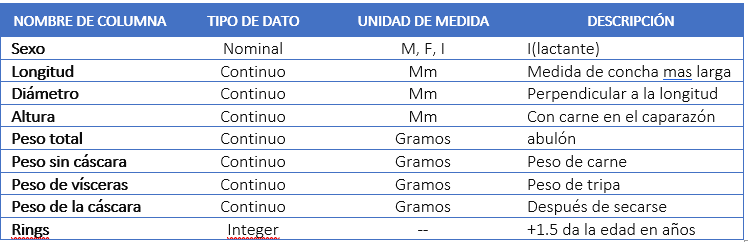

Las variables independientes(X) estaran compuestas por las columnas:

•	'Length (mm)'
•	'Diameter (mm)'
•	'Height (mm)'
•	'Whole (grams)'
•	'Shucked (grams)'
•	'Viscera (grams)'
•	'Shell (grams)'
•	'Rings (years)'


La variable dependiente(Y) estara compuesta por la columna ('Sex')
esto para lograr clasificar con los modelos de aprendizaje supervisado, el genero de los correspondientes datos.

In [1]:
import pandas as pd
dataset = pd.read_csv("abalone.csv", header=0)
X=dataset[['Length','Diameter','Height','Whole','Shucked','Viscera','Shell','Rings']]
y=dataset['Sex']

In [2]:
import numpy as np

from sklearn.impute import SimpleImputer
imputacion = SimpleImputer(missing_values=np.nan, strategy="mean")
X=imputacion.fit_transform(X)

print('\n',X)
print('\n',y)

matriz_imputer = imputacion.fit_transform(X)
from sklearn import preprocessing
matriz_normal = preprocessing.normalize(matriz_imputer)


 [[ 0.455   0.365   0.095  ...  0.101   0.15   15.    ]
 [ 0.35    0.265   0.09   ...  0.0485  0.07    7.    ]
 [ 0.53    0.42    0.135  ...  0.1415  0.21    9.    ]
 ...
 [ 0.6     0.475   0.205  ...  0.2875  0.308   9.    ]
 [ 0.625   0.485   0.15   ...  0.261   0.296  10.    ]
 [ 0.71    0.555   0.195  ...  0.3765  0.495  12.    ]]

 0       1
1       1
2       2
3       1
4       3
       ..
4172    2
4173    1
4174    1
4175    2
4176    1
Name: Sex, Length: 4177, dtype: int64


In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [13]:
X_trn=[]
X_tst=[]
y_trn=[]
y_tst=[]
aux=[]
ind=0
fila=[]
lista2=[]

auxs=[]
TABLASC=[]

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
iter_for_prediction = cv.split(X, y)

In [14]:
for index, (train_index, test_index) in enumerate(iter_for_prediction):
    print(index)
    randomf = RandomForestClassifier(random_state=0)
        
    for i in range(3341):
        ind = train_index[i]
        X_trn.append(X[ind])
    for j in range(836):
        ind=test_index[j]
        X_tst.append(X[ind])
    for k in range(3341):
        ind = train_index[k]
        y_trn.append(y[ind])
    for l in range(836):
        ind=test_index[l]
        y_tst.append(y[ind])
   # print('X_train:',X_trn,'\n')
   # print(len(X_trn))
   # print('X_test:',X_tst,'\n')
   # print('y_train:',y_trn)
   # print('y_test:',y_tst)
    
    
     
    imputacion = SimpleImputer(missing_values=np.nan, strategy="mean")
    
    T=imputacion.fit_transform(X_tst)
    matriz_imputer = imputacion.fit_transform(T)
    matriz_normal = preprocessing.normalize(matriz_imputer)
   
    xclase = MLPClassifier(activation="relu",solver='adam', hidden_layer_sizes=(100,),max_iter=300)
    xclase.fit(X_trn, y_trn)
    xy_prd = xclase.predict(X_tst)
    print('\n Y_PRED: ',xy_prd,' \n')

    print('XReporte: ',classification_report(y_tst, xy_prd))
    accuracy = accuracy_score(y_tst, xy_prd)
    print('Accuracy',accuracy)
    predecir3 = [[0.42,0.325,0.11,0.325,0.1245,0.0755,0.1025,7], [0.63,0.515,0.17,1.385,0.6355,0.2955,0.38,11]]
    #xclase.fit(X, y)
    print('MLP: ',xclase.predict(predecir3))
    print(xclase.score(X, y))
    
    auxs.append(accuracy)
    auxs.append(xclase.score(X, y))
    TABLASC.append(auxs)
    auxs=[]


0

 Y_PRED:  [1 2 1 3 2 1 3 1 1 3 1 1 1 1 3 3 2 1 1 1 3 3 3 1 3 3 1 3 1 1 1 3 1 3 1 1 3
 1 1 1 3 1 1 3 2 1 3 1 1 2 2 3 1 1 3 2 1 1 1 1 1 2 1 3 1 1 1 3 3 2 3 3 1 3
 3 2 1 3 1 1 1 1 2 1 1 3 2 1 2 1 1 2 3 1 3 1 3 1 3 3 3 3 1 1 1 1 1 2 1 2 3
 3 2 3 2 3 1 1 1 1 3 1 1 2 3 2 3 2 3 1 2 3 3 3 3 3 1 1 1 2 1 1 2 1 1 1 2 1
 1 1 1 1 1 1 2 3 1 3 3 3 3 1 3 3 1 1 1 2 3 3 3 1 3 3 1 3 1 1 2 1 3 2 1 2 1
 3 1 3 1 3 1 3 1 1 3 3 1 2 1 2 2 3 1 1 1 2 2 1 3 1 1 1 2 1 1 1 3 1 3 1 3 1
 1 1 3 1 3 1 1 1 1 1 2 1 3 3 3 1 1 1 1 3 3 1 1 1 1 1 1 2 3 1 1 3 3 1 1 3 2
 3 3 1 3 3 1 3 3 3 3 1 2 2 1 1 1 3 3 3 3 3 1 1 2 1 1 3 1 1 1 3 1 2 1 2 1 1
 1 1 1 1 1 1 2 3 2 1 3 1 3 3 1 3 3 1 1 1 2 2 3 1 1 1 1 3 3 1 2 3 1 1 1 3 2
 1 3 1 1 3 1 3 3 3 1 1 3 3 3 1 3 1 1 2 3 3 1 1 1 3 3 3 3 3 1 1 1 1 2 1 1 2
 1 1 3 1 2 1 1 1 3 1 1 1 3 2 3 3 1 3 1 3 1 3 1 2 1 2 1 1 3 3 2 1 2 1 1 2 2
 1 1 3 1 3 2 1 1 3 3 3 1 1 3 3 1 3 3 3 3 1 1 3 3 3 1 2 3 3 1 3 1 3 1 1 1 2
 3 1 2 1 1 1 1 3 1 3 1 1 2 3 1 1 1 3 1 3 3 1 1 3 1 3 1 2 3 1 2 1 3 1 1 1 2
 3 1 1 1 3 2

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



 Y_PRED:  [1 1 1 ... 3 3 1]  

XReporte:                precision    recall  f1-score   support

           1       0.51      0.59      0.54      2448
           2       0.52      0.41      0.46      2088
           3       0.74      0.76      0.75      2152

    accuracy                           0.59      6688
   macro avg       0.59      0.58      0.58      6688
weighted avg       0.59      0.59      0.58      6688

Accuracy 0.5862739234449761
MLP:  [3 1]
0.5882212113957386
8

 Y_PRED:  [1 2 1 ... 1 1 1]  

XReporte:                precision    recall  f1-score   support

           1       0.51      0.54      0.52      2754
           2       0.50      0.49      0.49      2349
           3       0.75      0.73      0.74      2421

    accuracy                           0.58      7524
   macro avg       0.59      0.58      0.59      7524
weighted avg       0.58      0.58      0.58      7524

Accuracy 0.5833333333333334
MLP:  [3 1]
0.5846301173090735
9

 Y_PRED:  [1 1 1 ... 3 2 3]  

obtenemos la prediccion de los datos objetivo, asi tambien un reporte que indica que tan bien predice la clasificacion de esa clase del conjunto de datos, tambien obtenemos un resultado de la exatitud con la que clasifico parametros de datos que le pasamos a predecir.

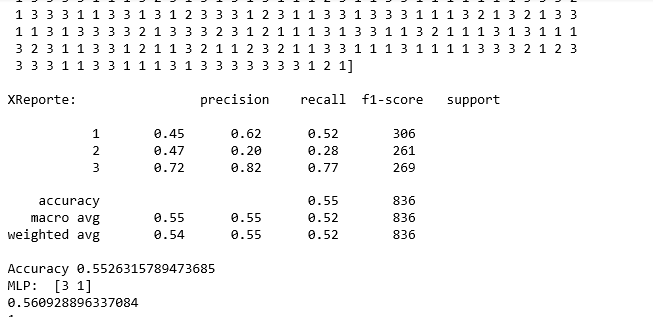

In [15]:
print(TABLASC)

[[0.5526315789473685, 0.560928896337084], [0.5610047846889952, 0.5666746468757481], [0.5689792663476874, 0.5654776155135265], [0.5675837320574163, 0.5630835527890831], [0.5700956937799043, 0.5724203974144123], [0.5817384370015949, 0.5846301173090735], [0.5673274094326726, 0.5649988029686378], [0.5862739234449761, 0.5882212113957386], [0.5833333333333334, 0.5846301173090735], [0.5860047846889952, 0.5870241800335169]]


obtenemos ua tabla de puntuaciones relacionados a la exactitud de prediccion con respecto a cada grupo de datos de cada split 

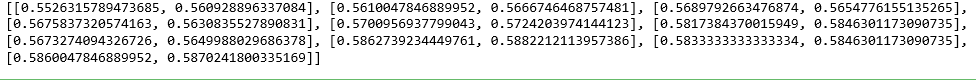